<a href="https://colab.research.google.com/github/NEBTICS/Fruits-Classsification-/blob/master/Fruits_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/NEBTICS/Fruits-Classsification-.git

fatal: destination path 'Fruits-Classsification-' already exists and is not an empty directory.


In [3]:
cd Fruits-Classsification-/

/content/Fruits-Classsification-


In [4]:
! pip install -q kaggle

In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"smithbarbose","key":"efd499fa06f6c2554fefc5408c46cac1"}'}

In [6]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle

In [7]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d balalexv/fruits-vegetables-photos

100% 2.58G/2.59G [00:51<00:00, 44.4MB/s]
100% 2.59G/2.59G [00:51<00:00, 53.7MB/s]


In [ ]:
!unzip fruits-vegetables-photos.zip

Importing library

In [10]:
import tensorflow as tf
import keras 
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [11]:
#Importing the data set 
#First we need to create the Image Augmantation
traning_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip='True')
test_datagen=ImageDataGenerator(rescale=1./255)

In [12]:
#creating the test & train sets
traning_set=traning_datagen.flow_from_directory('/content/Fruits-Classsification-/TRAIN',batch_size=32,target_size=(100,100),class_mode='categorical')
test_set=test_datagen.flow_from_directory('/content/Fruits-Classsification-/TEST',batch_size=32,target_size=(100,100),class_mode='categorical')

Found 5658 images belonging to 15 classes.
Found 135 images belonging to 15 classes.


In [16]:
model=tf.keras.Sequential()
#first layer
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,input_shape=[100,100,3],activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
#second
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
#third
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
#fourth
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
#
model.add(tf.keras.layers.Flatten())
#adding the nural net
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=500,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=15,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x=traning_set,validation_data=test_set,epochs=20)

Epoch 1/20
177/177 [==============================] - 94s 532ms/step - loss: 2.5330 - accuracy: 0.1299 - val_loss: 2.8087 - val_accuracy: 0.1333
Epoch 2/20
177/177 [==============================] - 94s 531ms/step - loss: 2.0288 - accuracy: 0.3123 - val_loss: 1.7613 - val_accuracy: 0.4000
Epoch 3/20
177/177 [==============================] - 94s 530ms/step - loss: 1.1705 - accuracy: 0.5983 - val_loss: 1.2745 - val_accuracy: 0.5778
Epoch 4/20
177/177 [==============================] - 94s 529ms/step - loss: 0.8644 - accuracy: 0.6919 - val_loss: 1.4377 - val_accuracy: 0.5111
Epoch 5/20
177/177 [==============================] - 94s 531ms/step - loss: 0.7142 - accuracy: 0.7423 - val_loss: 1.3956 - val_accuracy: 0.5037
Epoch 6/20
177/177 [==============================] - 94s 531ms/step - loss: 0.5981 - accuracy: 0.7775 - val_loss: 0.9750 - val_accuracy: 0.6296
Epoch 7/20
177/177 [==============================] - 94s 531ms/step - loss: 0.4972 - accuracy: 0.8139 - val_loss: 1.3525 - val_ac

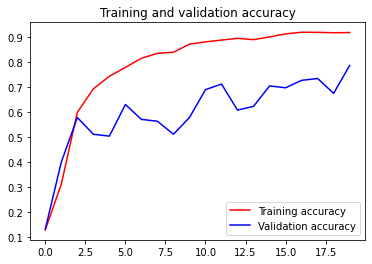

<Figure size 432x288 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
from keras.preprocessing import image
test_image = image.load_img('/content/tamato.jpg',target_size=(100,100))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
x=np.argmax(result)
d=np.load('/content/Fruits-Classsification-/Fruits Labels.npy')
print(x)
print(d[x])

In [19]:

test_batches = ImageDataGenerator().flow_from_directory('/content/Fruits-Classsification-/TRAIN')

test_labels = []

for i in range(0,3):
    test_labels.extend(np.array(test_batches[i][1]))
import numpy as np
#print(np.argmax(test_labels))    
print(len(test_labels))
x=test_batches.class_indices.keys()

Found 5658 images belonging to 15 classes.
96


In [20]:
x=test_batches.class_indices.keys()
y=[]
for i in range(130):
  y.extend(x)
import numpy as np
z=np.array(y)
print(z)
np.save('Fruits Labels',z)

d=np.load('/content/Fruits-Classsification-/Fruits Labels.npy')
print(d)

['bananas' 'cucumber_prickly' 'gala' ... 'pepper_yellow' 'sultana'
 'tomato_plum']
['bananas' 'cucumber_prickly' 'gala' ... 'pepper_yellow' 'sultana'
 'tomato_plum']


In [28]:
model.save('/content/drive/My Drive/Machine Learning/First_Task.h5')